In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
image_size = (224,224)
batch_size = 32

# Train_Validation_data

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory(
                directory = r"C:\Users\Bhaypreet\OneDrive\Pictures\IIT ROPAR\data_science_projects\INDIAN FOOD\Indian Food Images",
                image_size = image_size,
                batch_size = 32,
                validation_split=0.2,
                subset="training",
                seed=123   
)

val_data = tf.keras.utils.image_dataset_from_directory(
                directory = r"C:\Users\Bhaypreet\OneDrive\Pictures\IIT ROPAR\data_science_projects\INDIAN FOOD\Indian Food Images",
                image_size = image_size,
                batch_size = 32,
                validation_split=0.2,
                subset="validation",
                seed=123   
)

class_names = train_data.class_names

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.RandomFlip("horizontal"),
#     tf.keras.layers.RandomRotation(0.1),
#     tf.keras.layers.RandomZoom(0.1),
#     tf.keras.layers.RandomContrast(0.1),
# ])

# train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))
# val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 4000 files belonging to 80 classes.
Using 3200 files for training.
Found 4000 files belonging to 80 classes.
Using 800 files for validation.


# Normalization

In [4]:
def normalizer(image,label):
    image = tf.cast(image,tf.float32)/255.0
    return image,label

train_data = train_data.map(normalizer)
val_data = val_data.map(normalizer)

# MobileNet Model

In [5]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Freeze the base model

model = models.Sequential([
            base_model,
            layers.GlobalAveragePooling2D(),
            layers.Dropout(0.5),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(80, activation='softmax')
])


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

earlystop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)
reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6, verbose=1)


In [7]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

# Training Starts

In [8]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=25,callbacks = [reduce_LR,earlystop])


Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.0169 - loss: 4.6963 - val_accuracy: 0.0637 - val_loss: 4.2672 - learning_rate: 0.0010
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.0544 - loss: 4.1581 - val_accuracy: 0.1538 - val_loss: 3.7847 - learning_rate: 0.0010
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.1220 - loss: 3.7491 - val_accuracy: 0.2338 - val_loss: 3.2216 - learning_rate: 0.0010
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.1738 - loss: 3.3843 - val_accuracy: 0.2825 - val_loss: 2.9010 - learning_rate: 0.0010
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.2468 - loss: 3.0190 - val_accuracy: 0.3537 - val_loss: 2.6402 - learning_rate: 0.0010
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.2640 - loss: 2.8004 - val_accuracy: 0.3762 - val_loss: 2.4996 - learning_rate: 0.0010
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.2852 - loss: 2.

# Accuracy And Loss

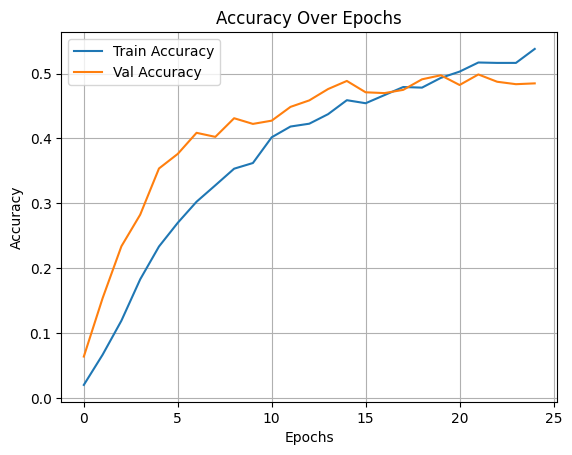

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

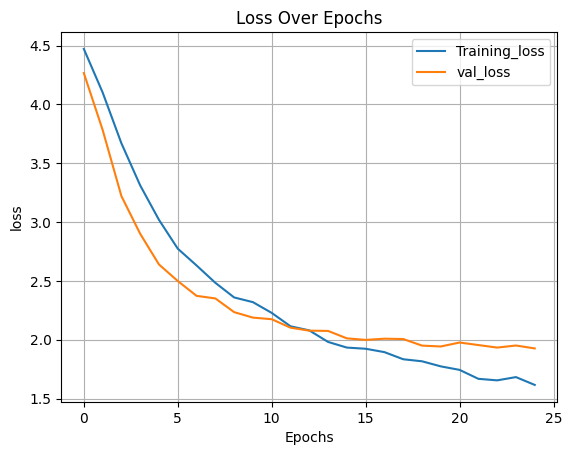

In [10]:
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Saving model

In [11]:
model.save("indian_food_model.h5")
